In [3]:
# Problem Statement 1: A retail store that has multiple outlets across the country are facing issues in managing 
# the inventory - to match the demand with respect to supply. You are a data scientist,
# who has to come up with useful insights using the data and make prediction models to forecast the sales for 
# X number of months/years.

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
fuel = pd.read_csv("walmart.csv")

In [5]:
fuel

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [6]:
fuel.shape

(6435, 8)

In [7]:
fuel.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
fuel.isnull()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [10]:
fuel.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [11]:
fuel['Store'] = np.where(fuel['Store'] == 'yes',1,0)
fuel['Store'] = fuel['Store']
type(fuel["Store"])

pandas.core.series.Series

In [12]:
fuel['Weekly_Sales'] = np.where(fuel['Weekly_Sales'] == 'yes',1,0)
fuel['Weekly_Sales'] = fuel['Weekly_Sales'].astype(str)

In [13]:
fuel.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,05-02-2010,0,0,42.31,2.572,211.096358,8.106
1,0,12-02-2010,0,1,38.51,2.548,211.242170,8.106
2,0,19-02-2010,0,0,39.93,2.514,211.289143,8.106
3,0,26-02-2010,0,0,46.63,2.561,211.319643,8.106
4,0,05-03-2010,0,0,46.50,2.625,211.350143,8.106
5,0,12-03-2010,0,0,57.79,2.667,211.380643,8.106
6,0,19-03-2010,0,0,54.58,2.720,211.215635,8.106
7,0,26-03-2010,0,0,51.45,2.732,211.018042,8.106
8,0,02-04-2010,0,0,62.27,2.719,210.820450,7.808
9,0,09-04-2010,0,0,65.86,2.770,210.622857,7.808


In [14]:
fuel.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [15]:
print(fuel['Fuel_Price'].mode())

0    3.638
dtype: float64


<AxesSubplot:xlabel='Holiday_Flag'>

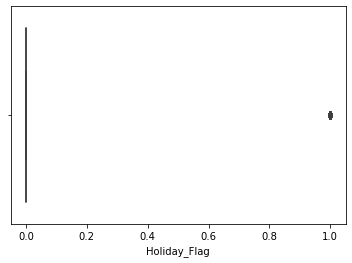

In [16]:
# outlier
import seaborn as sns
sns.boxplot(x=fuel['Holiday_Flag'])

<AxesSubplot:xlabel='Temperature'>

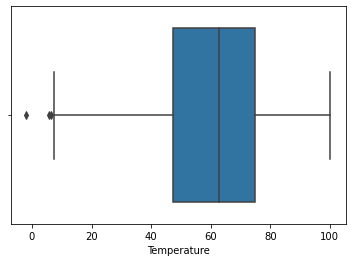

In [22]:
import seaborn as sns
sns.boxplot(x=fuel['Temperature'])

<AxesSubplot:xlabel='Unemployment'>

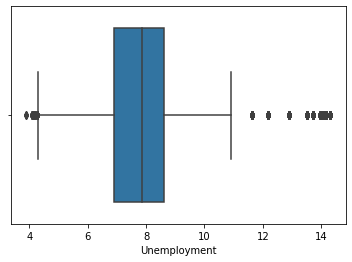

In [17]:
import seaborn as sns
sns.boxplot(x=fuel['Unemployment'])

<AxesSubplot:xlabel='Store'>

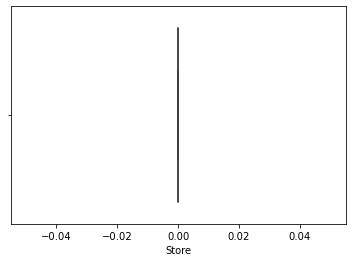

In [18]:
import seaborn as sns
sns.boxplot(x=fuel['Store'])

<AxesSubplot:xlabel='Fuel_Price'>

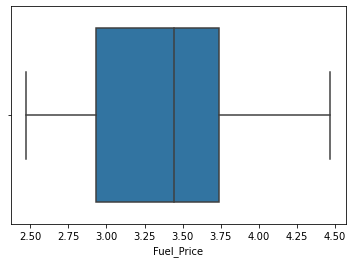

In [19]:
import seaborn as sns
sns.boxplot(x=fuel['Fuel_Price'])

<AxesSubplot:xlabel='CPI'>

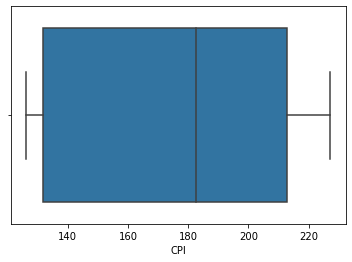

In [20]:
import seaborn as sns
sns.boxplot(x=fuel['CPI'])

<AxesSubplot:xlabel='Store'>

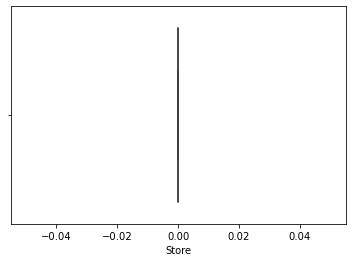

In [21]:
sns.boxplot(x=fuel['Store'])

<AxesSubplot:xlabel='CPI'>

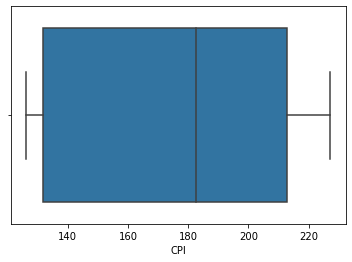

In [22]:
sns.boxplot(x=fuel['CPI'])

In [23]:
Q1A = fuel.Temperature.quantile(0.25)
Q3A = fuel.Temperature.quantile(0.75)
IQRA= Q3A-Q1A
print(IQRA)

27.479999999999997


In [24]:
Q1A = fuel.Unemployment.quantile(0.25)
Q3A = fuel.Unemployment.quantile(0.75)
IQRA= Q3A-Q1A
print(IQRA)

1.7309999999999999


In [25]:
Q1A = fuel.Holiday_Flag.quantile(0.25)
Q3A = fuel.Holiday_Flag.quantile(0.75)
IQRA= Q3A-Q1A
print(IQRA)

0.0


In [26]:
Q1A = fuel.CPI.quantile(0.25)
Q3A = fuel.CPI.quantile(0.75)
IQRA= Q3A-Q1A
print(IQRA)

81.00829345


In [31]:
Q1A = fuel.Fuel_Price.quantile(0.25)
Q3A = fuel.Fuel_Price.quantile(0.75)
IQRA= Q3A-Q1A
print(IQRA)

0.802


In [32]:
Q1A = fuel.Store.quantile(0.25)
Q3A = fuel.Store.quantile(0.75)
IQRA= Q3A-Q1A
print(IQRA)

0.0


In [33]:
print(Q1A-0.25*IQRA)
print(Q3A+0.75*IQRA)

0.0
0.0


In [34]:
Q1 = fuel.quantile(0.25)
Q3 = fuel.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Store            0.000000
Holiday_Flag     0.000000
Temperature     27.480000
Fuel_Price       0.802000
CPI             81.008293
Unemployment     1.731000
dtype: float64


In [35]:
print(fuel < (Q1 - 1.5 * IQR)) |(fuel > (Q3 + 1.5 * IQR))

        CPI   Date  Fuel_Price  Holiday_Flag  Store  Temperature  \
0     False  False       False         False  False        False   
1     False  False       False         False  False        False   
2     False  False       False         False  False        False   
3     False  False       False         False  False        False   
4     False  False       False         False  False        False   
...     ...    ...         ...           ...    ...          ...   
6430  False  False       False         False  False        False   
6431  False  False       False         False  False        False   
6432  False  False       False         False  False        False   
6433  False  False       False         False  False        False   
6434  False  False       False         False  False        False   

      Unemployment  Weekly_Sales  
0            False         False  
1            False         False  
2            False         False  
3            False         False  
4       

<ipython-input-35-b2a80c08f125>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(fuel < (Q1 - 1.5 * IQR)) |(fuel > (Q3 + 1.5 * IQR))
<ipython-input-35-b2a80c08f125>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(fuel < (Q1 - 1.5 * IQR)) |(fuel > (Q3 + 1.5 * IQR))


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [41]:
fuel = fuel[~((fuel < (Q1 - 1.5 * IQR)) |(fuel> (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-41-c27982b939da>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  fuel = fuel[~((fuel < (Q1 - 1.5 * IQR)) |(fuel> (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-41-c27982b939da>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  fuel = fuel[~((fuel < (Q1 - 1.5 * IQR)) |(fuel> (Q3 + 1.5 * IQR))).any(axis=1)]


In [36]:
col_list = list(fuel.columns)

In [37]:
col_list

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [38]:
col_list.remove('Store')

In [40]:
col_list

['Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [50]:
bins = [0, 1, 5, 10, 25, 50, 100]
fuel['Unemployment'] = pd.cut(fuel['Fuel_Price'], bins=10,)
fuel['CPI'] = fuel.Store.astype(str)

<ipython-input-50-35e20d6ae6cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel['Unemployment'] = pd.cut(fuel['Fuel_Price'], bins=10,)
<ipython-input-50-35e20d6ae6cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fuel['CPI'] = fuel.Store.astype(str)


In [44]:
fuel.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,05-02-2010,0,0,42.31,2.572,211.096358,8.106
1,0,12-02-2010,0,1,38.51,2.548,211.242170,8.106
2,0,19-02-2010,0,0,39.93,2.514,211.289143,8.106
3,0,26-02-2010,0,0,46.63,2.561,211.319643,8.106
4,0,05-03-2010,0,0,46.50,2.625,211.350143,8.106
5,0,12-03-2010,0,0,57.79,2.667,211.380643,8.106
6,0,19-03-2010,0,0,54.58,2.720,211.215635,8.106
7,0,26-03-2010,0,0,51.45,2.732,211.018042,8.106
8,0,02-04-2010,0,0,62.27,2.719,210.820450,7.808
9,0,09-04-2010,0,0,65.86,2.770,210.622857,7.808


In [45]:
fuel['Unemployment'].unique()

array([ 8.106,  7.808,  7.787,  7.838,  7.742,  7.682,  7.962,  7.866,
        7.348,  7.143,  6.908,  6.573,  8.324,  8.2  ,  8.099,  8.163,
        8.028,  7.931,  7.852,  7.441,  7.057,  6.891,  6.565,  6.17 ,
        7.368,  7.343,  7.346,  7.564,  7.551,  7.574,  7.567,  7.197,
        6.833,  6.664,  6.334,  6.034,  8.623,  7.896,  7.372,  7.127,
        6.51 ,  5.946,  5.644,  5.143,  4.607,  4.308,  4.077,  3.879,
        6.566,  6.465,  6.496,  6.768,  6.634,  6.489,  6.529,  6.3  ,
        5.943,  5.801,  5.603,  5.422,  7.259,  7.092,  6.973,  7.007,
        6.858,  6.855,  6.925,  6.551,  6.132,  5.964,  5.668,  5.329,
        9.014,  8.963,  9.017,  9.137,  8.818,  8.595,  8.622,  8.513,
        8.256,  8.09 ,  7.872,  7.557,  6.299,  6.29 ,  6.315,  6.433,
        6.262,  6.297,  6.425,  6.123,  5.825,  5.679,  5.401,  5.124,
        6.415,  6.384,  6.442,  6.56 ,  6.416,  6.38 ,  6.404,  6.054,
        5.667,  5.539,  5.277,  4.954,  9.765,  9.524,  9.199,  9.003,
      

In [53]:
fuel['Fuel_Price'].unique()

array([2.572, 2.514, 2.561, 2.625, 2.667, 2.72 , 2.732, 2.719, 2.77 ,
       2.808, 2.795, 2.78 , 2.835, 2.854, 2.826, 2.759, 2.705, 2.668,
       2.637, 2.653, 2.669, 2.642, 2.623, 2.608, 2.64 , 2.627, 2.692,
       2.664, 2.619, 2.577, 2.582, 2.624, 2.603, 2.633, 2.725, 2.716,
       2.689, 2.728, 2.771, 2.708, 2.843, 2.869, 2.886, 2.976, 2.983,
       3.016, 3.01 , 2.989, 3.045, 3.065, 3.288, 3.459, 3.488, 3.473,
       3.524, 3.622, 3.743, 3.807, 3.81 , 3.906, 3.899, 3.907, 3.786,
       3.699, 3.648, 3.637, 3.594, 3.48 , 3.575, 3.651, 3.682, 3.684,
       3.638, 3.554, 3.523, 3.533, 3.526, 3.467, 3.355, 3.285, 3.274,
       3.353, 3.372, 3.332, 3.297, 3.308, 3.172, 3.158, 3.159, 3.112,
       3.157, 3.261, 3.268, 3.29 , 3.36 , 3.51 , 3.555, 3.63 , 3.669,
       3.734, 3.787, 3.845, 3.891, 3.877, 3.814, 3.749, 3.688, 3.561,
       3.501, 3.452, 3.393, 3.346, 3.286, 3.227, 3.256, 3.311, 3.407,
       3.417, 3.494, 3.571, 3.62 , 3.717, 3.721, 3.666, 3.617, 3.601,
       3.506, 2.598,

In [46]:
fuel['Store'].unique()

array([0])

In [47]:
fuel['CPI'].unique()

array([211.0963582, 211.2421698, 211.2891429, ..., 214.6772833,
       214.7212488, 214.7415392])

In [48]:
fuel.dtypes

Store             int64
Date             object
Weekly_Sales     object
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [49]:
col_list = []
for col in fuel.columns:
    if ((fuel[col].dtype == 'object') & (col != 'Fuel_Price') ):
        col_list.append(col)

In [50]:
col_list

['Date', 'Weekly_Sales']

In [51]:
col_list
x=fuel

In [52]:
x

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,0,05-02-2010,0,0,42.31,2.572,211.096358,8.106
1,0,12-02-2010,0,1,38.51,2.548,211.242170,8.106
2,0,19-02-2010,0,0,39.93,2.514,211.289143,8.106
3,0,26-02-2010,0,0,46.63,2.561,211.319643,8.106
4,0,05-03-2010,0,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,0,28-09-2012,0,0,64.88,3.997,192.013558,8.684
6431,0,05-10-2012,0,0,64.89,3.985,192.170412,8.667
6432,0,12-10-2012,0,0,54.47,4.000,192.327265,8.667
6433,0,19-10-2012,0,0,56.47,3.969,192.330854,8.667


In [53]:
import pandas as pd

In [54]:
walmart = pd.read_csv("walmart.csv")

In [55]:
walmart

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in walmart.columns:
    if ((walmart[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

In [56]:
col_list

['Date', 'Weekly_Sales']

In [58]:
co_l=list(walmart.columns)
co_l
co_l.remove('Store')

In [59]:
co_l

['Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [60]:
X=walmart[col_list]
X

,Date,Weekly_Sales
0,05-02-2010,1643690.90
1,12-02-2010,1641957.44
2,19-02-2010,1611968.17
3,26-02-2010,1409727.59
4,05-03-2010,1554806.68
...,...,...
6430,28-09-2012,713173.95
6431,05-10-2012,733455.07
6432,12-10-2012,734464.36
6433,19-10-2012,718125.53


In [229]:
for i in range(len(X.columns)):
    print(i)

0
1
2
3
4
5
6


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in walmart.columns:
    if ((walmart[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = walmart[col_list]
vif_walmart = pd.DataFrame() 
vif_walmart["feature"] = X.columns 
vif_walmart["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_walmart

,feature,VIF
0,Store,4.835615
1,Weekly_Sales,4.666177
2,Holiday_Flag,1.103494
3,Temperature,13.373877
4,Fuel_Price,30.144859
5,CPI,14.851518
6,Unemployment,16.528135


In [62]:
walmart=walmart.drop(['Weekly_Sales'], axis = 1) 

In [63]:
walmart

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,28-09-2012,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,0,56.47,3.969,192.330854,8.667


In [88]:
col_list = []
for col in walmart.columns:
    if ((walmart[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = walmart[col_list]
vif_walmart = pd.DataFrame() 
vif_walmart["feature"] = X.columns 
vif_walmart["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_walmart)

        feature        VIF
0         Store   4.402614
1  Holiday_Flag   1.099768
2   Temperature  13.362057
3    Fuel_Price  26.734875
4           CPI  14.787046
5  Unemployment  16.306669


In [64]:
walmart=walmart.drop(['CPI'], axis = 1)

In [65]:
walmart

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,Unemployment
0,1,05-02-2010,0,42.31,2.572,8.106
1,1,12-02-2010,1,38.51,2.548,8.106
2,1,19-02-2010,0,39.93,2.514,8.106
3,1,26-02-2010,0,46.63,2.561,8.106
4,1,05-03-2010,0,46.50,2.625,8.106
...,...,...,...,...,...,...
6430,45,28-09-2012,0,64.88,3.997,8.684
6431,45,05-10-2012,0,64.89,3.985,8.667
6432,45,12-10-2012,0,54.47,4.000,8.667
6433,45,19-10-2012,0,56.47,3.969,8.667


In [66]:
vif_walmart.feature

0           Store
1    Weekly_Sales
2    Holiday_Flag
3     Temperature
4      Fuel_Price
5             CPI
6    Unemployment
Name: feature, dtype: object

In [67]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Holiday_Flag'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>]], dtype=object)

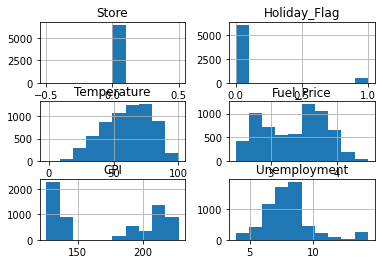

In [68]:
fuel.hist()

array([[<AxesSubplot:title={'center':'Temperature'}>]], dtype=object)

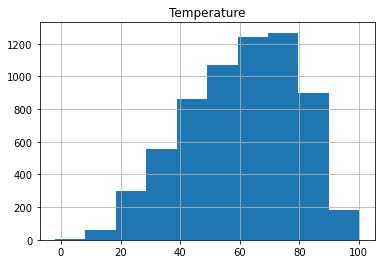

In [72]:
fuel.hist("Temperature")

In [73]:
x = pd.DataFrame(walmart['Store'])

In [74]:
x

,Store
0,1
1,1
2,1
3,1
4,1
...,...
6430,45
6431,45
6432,45
6433,45


In [75]:
y = pd.DataFrame(walmart['Fuel_Price'])

In [76]:
y

,Fuel_Price
0,2.572
1,2.548
2,2.514
3,2.561
4,2.625
...,...
6430,3.997
6431,3.985
6432,4.000
6433,3.969


In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state= 5)

In [81]:
from sklearn.linear_model import LinearRegression
 

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state= 5)

In [89]:
lin.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred=lin.predict(x_test)

In [91]:
y_pred

array([[3.33833451],
       [3.39645693],
       [3.33003131],
       ...,
       [3.38815373],
       [3.35909252],
       [3.38192633]])

In [87]:
x_pred=lin.predict(y_test)

In [88]:
x_pred

array([[3.32095383],
       [3.32114688],
       [3.32251276],
       ...,
       [3.32291131],
       [3.32112197],
       [3.32193776]])